# Task for today:

- compute the error between Lagrange interpolation for equispaced points (in "approximate Linfty") and a given function when the degree increases
- compute the error between Lagrange interpolation for Chebyshev (in "approximate Linfty") and a given function when the degree increases
- compute the error between Bernstein approximation (in "approximate Linfty") and a given function when the degree increases
- compute the L2 projection and compute the error ("in approximate Linfty") norm and compare with previous results


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.special

def lagrange(i, q, x):
    return product([(x-qj)/(q[i]-qj) for qj in q if qj != q[i]], axis=0)

def bernstein(i, q, x):
    n = len(q)-1
    return scipy.special.binom(n,i)*(1-x)**(n-i)*x**i

def cheb(n):
    return numpy.polynomial.chebyshev.chebgauss(n)[0]*.5+.5

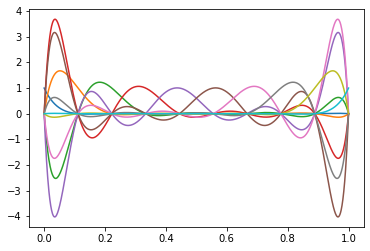

In [3]:
x = linspace(0,1,1025)
q = linspace(0,1,10)
y = array([lagrange(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

[0.99384417 0.94550326 0.85355339 0.72699525 0.57821723 0.42178277
 0.27300475 0.14644661 0.05449674 0.00615583]


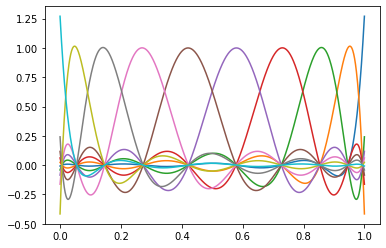

In [4]:
q = cheb(10)
print(q)
y = array([lagrange(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

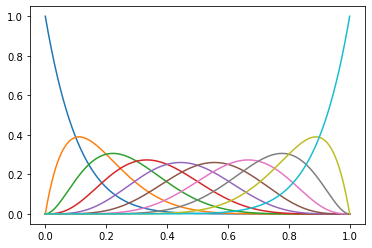

In [9]:
q = linspace(0,1,10)
y = array([bernstein(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

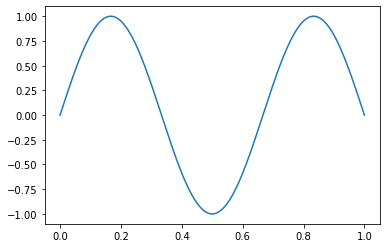

In [12]:
def myfun(x):
    return 1/(1+100*(x-.5)**2)

def myfun(x):
    return sin(3*numpy.pi*x)


plot(x, myfun(x))

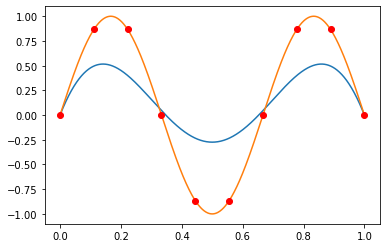

In [14]:
p = y.T.dot(myfun(q))
f = myfun(x)

plot(x,p)
plot(x,f)
plot(q,myfun(q), 'or')

In [8]:
linfty = max(abs(f-p))
linfty

0.72598414958382995

In [15]:
def error(q, myfun, interpolation=lagrange) :    
    y = array([interpolation(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    return (max(abs(f-p)))

In [16]:
N = range(3, 30)
error_equispaced = []
error_cheb = []
error_bernstein = []
for n in N:
    error_cheb.append(error(cheb(n), myfun))
    error_equispaced.append(error(linspace(0,1,n), myfun))
    error_bernstein.append(error(linspace(0,1,n), myfun, bernstein))


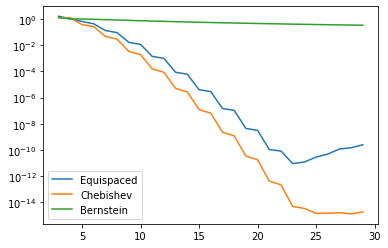

In [17]:
semilogy(N, error_equispaced)
semilogy(N, error_cheb)
semilogy(N, error_bernstein)
_ = legend(['Equispaced','Chebishev','Bernstein'])

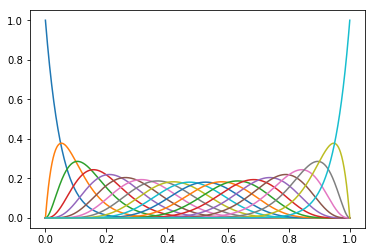

In [12]:
q = linspace(0,1,20)
y = array([bernstein(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

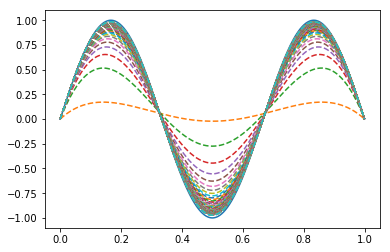

In [13]:
N = range(5,400,5)
plot(x,myfun(x))

for n in N:
    q = linspace(0,1,n)
    y = array([bernstein(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    _ = plot(x, p, '--')


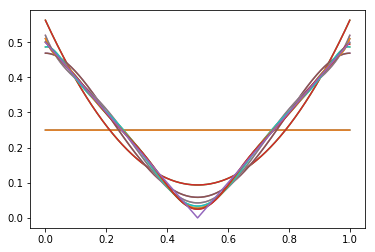

In [14]:
def myfun(x):
    return abs(x-.5)

import scipy
from scipy.integrate import quad as integrate

N = range(1,15)

for n in N:
    M = zeros((n,n))

    for i in range(n):
        for j in range(n):
            M[i,j] = 1.0/(i+j+1)

    F = array([integrate(lambda x: myfun(x)*x**i, 0,1)[0] for i in range(n)])
    pi = linalg.solve(M, F)
    p = sum([x**i*pi[i] for i in range(n)], axis=0)
    plot(x,p)
plot(x,myfun(x))

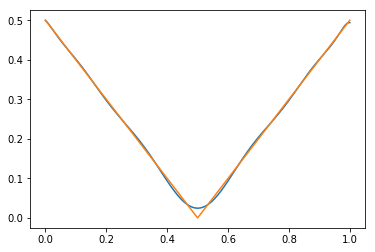

In [15]:
plot(x,p)
plot(x,myfun(x))

In [16]:
max(abs(p-myfun(x)))

0.02462443416821003

Why do we get these errors in the L2 projection? The matrix M is not well conditioned...

In [17]:
linalg.cond(M)

6.2007862631614438e+17

Let's turn to numerical quadrature, and Legendre polynomials (for which M is the identity by construction...)

In [18]:
from numpy.polynomial.legendre import leggauss
from numpy.polynomial.legendre import legval
from numpy.polynomial.legendre import Legendre

In [19]:
n = 10
N = n+5


q,w = leggauss(N)
w *= .5
q +=1
q /=2

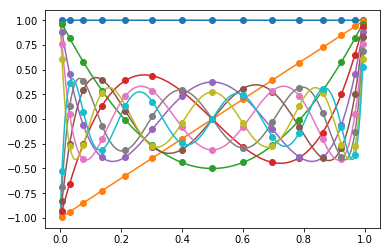

In [20]:
v = array([Legendre.basis(i, domain=[0,1])(x) for i in range(n)])
vq = array([Legendre.basis(i, domain=[0,1])(q) for i in range(n)])
_ = plot(x,v.T)
_ = plot(q, vq.T, 'o')

Check that we get a diagonal matrix as M:

In [21]:
vq.shape

(10, 15)

In [22]:
M = einsum('iq, jq, q', vq, vq, w)

In [23]:
diag = array([M[i,i] for i in range(n)])

In [24]:
diag

array([ 1.        ,  0.33333333,  0.2       ,  0.14285714,  0.11111111,
        0.09090909,  0.07692308,  0.06666667,  0.05882353,  0.05263158])

Now perform the integral

In [25]:
pi = sum(vq*myfun(q)*w, axis=1)

And plot the function, and its interpolation

In [26]:
p = (pi/diag).dot(v)

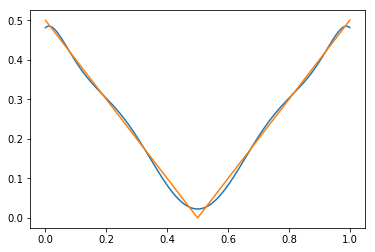

In [27]:
plot(x, p)
_ = plot(x, myfun(x))